# The Perceptron Algorithm

In this Jupyter notebook, we will implement the perceptron algorithm written with Julia utilizing the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

We will also implement the following packages: 
* RDatasets [documentation](https://github.com/JuliaStats/RDatasets.jl)
* Plots [documentation](http://docs.juliaplots.org/latest/)

The perceptron algorithm is utilized for the supervised learning of binary classifiers (meaning its task is to classify the elements of a set into two groups on the basis of the classification rule). It is also a single-layer neural network consisting of four main parts: input values, weights and bias, net sum, and an activation function.

![Perceptron](perceptronTheory.png)

For this project, we will only observe sepal length and sepal width in our data to illustrate the prediction of species. Furthermore, the perceptron algorithm can only be used when our data is linearly separable.  

In [11]:
using RDatasets
using Plots
theme(:dark)

# Load the iris dataset from RDatasets package

iris = dataset("datasets", "iris")

# Access the first 100 entries of data. In this notebook we only consider two features per data entry, 
# which are sepal length and sepal width.
X_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]

# Setosa data will be labeled 1, versicolor data will ba labeled -1
Y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100];

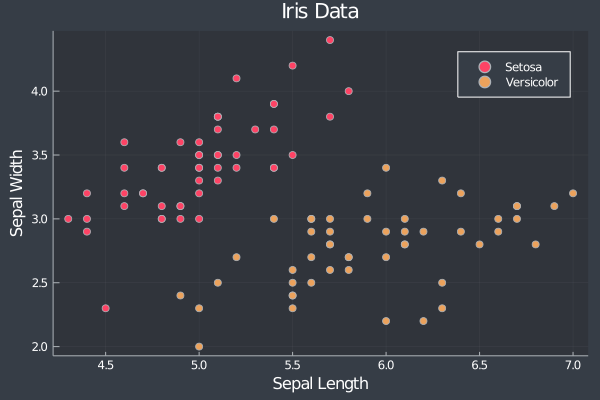

In [21]:
# Visualize the data with the following code. This will confirm that the data is linearly separable

scatter(X_data[1:50], 
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data")

scatter!(X_data[51:100],
        label = "Versicolor")

From the plot, we can observe the sepal data for setosa and versicolor are linearly separable. Hence, we can proceed with the perceptron algorithm to determine the flower species using the sepal data.

The activation function below applies a step rule (convert the numerical output into +1 or -1) to check if the output of the weighting function is greater than zero or not. Step function gets triggered above a certain value of the neuron output; else it outputs zero. Sign Function outputs +1 or -1 depending on whether neuron output is greater than zero or not.

In the perceptron learning algorithm, the predicted output is compared with the known output. If it does not match, the error is propagated backward to allow weight adjustment to happen.

![PerceptronUpdateRule](perceptronUpdateRule.jpg)

In [50]:
# Perceptron Activation Function
function sign(weights, x)
    """ 
    Sign function input for the out algorithm. We use this function to determine the sign of the
    dot product between weights and x vector to feed into the out algorithm.
    
    Arguments:
        weights (Array): The parameter within a neural network that transforms input data within the network's hidden layers.
                        These are random input based on the size of the x_data vector size
    
        x ([tuple]):    single tuple of the x_data from the overall dataset
    
    Outputs:
        Returns a value of -1 or 1 depending on the sign of the dot product (negative or positive)
    """
    x̂ = [1.0, x[1], x[2]]
    return weights'x̂ > 0 ? 1 : -1
end

# Perceptron Update Rule
function perceptron_update(weights, x, y)
    if sign(weights, x) != y
        weights += y*[1.0, x[1], x[2]]
    end
    return weights
end

# Error Count
function error_count(weights, feature_set, labels)
    return sum([sign(weights, feature_set[i]) != labels[i] ? 1 : 0 for i = 1:length(feature_set)])
end

error_count (generic function with 1 method)

In [54]:
# Iterate the perceptron update rule by randomly testing entries in the dataset. This
# is equivalent to what we will learn to be stochastic gradient descent.

function perceptron_algorithm(weights, feature_set, labels, ϵ)
    
    error_measures = []
    append!(error_measures, error_count(weights, feature_set, labels))
    
    weight_vector = []
    
    while error_count(weights, feature_set, labels) > ϵ
        for i = 1:length(feature_set)
            weights = update(weights, feature_set[i],labels[i])
        end
        
        append!(weight_vector, weights)
        append!(error_measures, error_count(weights, feature_set, labels))
    end
    
    return weights, weight_vector, error_measures
end

perceptron_algorithm (generic function with 1 method)

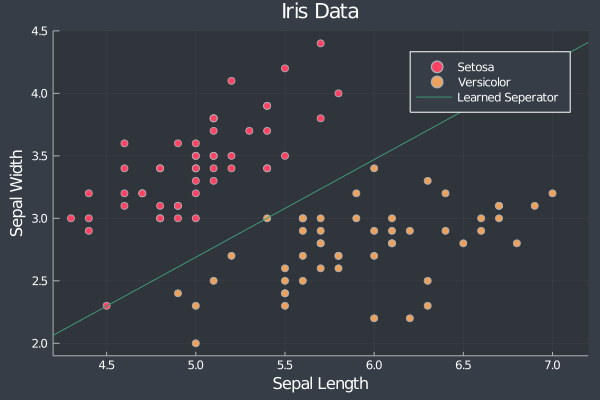

In [55]:
# Overlay the line created by the weights we have formed onto the plot of the iris data

scatter(X_data[1:50], 
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data")

scatter!(X_data[51:100],
        label = "Versicolor")

plot!(x -> (-w[1]-w[2]*x)/w[3], 
    label = "Learned Seperator", 
    xlims = (4.2,7.2), 
    ylims = (1.90,4.5))


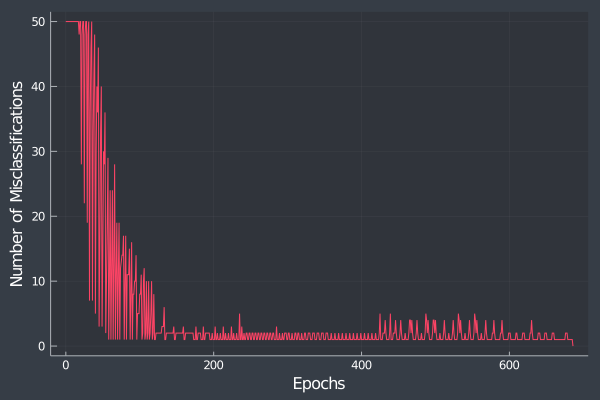

In [56]:
plot(error_points, 
    xaxis = "Epochs", 
    yaxis = "Number of Misclassifications",
    legend = false)